In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [3]:
def null_percentage(data):
    null_values_total = data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

In [4]:
print("The shape of the training dataset is: {}".format(df_train.shape))
print("The shape of the testing dataset is: {}".format(df_test.shape))

The shape of the training dataset is: (307511, 122)
The shape of the testing dataset is: (48744, 121)


In [5]:
# Dropping columns that contain more than 50 percent null values per feature
for column in df_train.columns:
    if null_percentage(df_train[column].to_frame())['Percent'][0] > 50.00:
        df_train.drop([column], axis = 1, inplace = True)
        df_test.drop([column], axis = 1, inplace = True)

In [6]:
def mean_imputation(data):
    """
    This function would take the NULL values present in data and replace them with average values of the data respectively.
    """
    imputed_data = data.fillna(data.mean()).copy()
    return imputed_data

def median_imputation(data):
    """
    This function would take the NULL values present in data and replace them with median values in our data respectively.
    """
    imputed_data = data.fillna(data.median()).copy()
    return imputed_data

def mode_imputation(data):
    """
    This function would take the NULL values present in data and replace them with mode values of the given data respectively.
    """
    imputed_data = data.fillna(data.mode()).copy()
    return imputed_data

In [7]:
mean_imputation(df_train['FLOORSMAX_AVG'])
mean_imputation(df_train['FLOORSMAX_MEDI'])
mean_imputation(df_train['FLOORSMAX_MODE'])
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_AVG'])
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MEDI'])
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MODE'])

0         0.972200
1         0.985100
2         0.977065
3         0.977065
4         0.977065
            ...   
307506    0.978200
307507    0.972700
307508    0.981600
307509    0.977200
307510    0.988100
Name: YEARS_BEGINEXPLUATATION_MODE, Length: 307511, dtype: float64

In [8]:
null_percent_values = null_percentage(df_train)['Percent']
features_with_low_null_values = []
for i in range(len(df_train.columns)):
    if null_percent_values.iloc[i] < 10.0:
        features_with_low_null_values.append(null_percent_values.index[i]) 

In [9]:
df_train_converted = df_train[features_with_low_null_values]

In [10]:
## This is done to get the categorical features. We can then perform mode imputation to get the values respectively.
## The suggestion was implemented from the website https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
total_columns =df_train_converted.columns 
numeric_data = df_train_converted._get_numeric_data()
categorical_columns = list(set(total_columns) - set(numeric_data.columns))

In [11]:
categorical_data = df_train_converted[categorical_columns]

In [12]:
mode_imputation(categorical_data)

,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE
0,Single / not married,House / apartment,Cash loans,Y,M,N,Business Entity Type 3,WEDNESDAY,Working,Unaccompanied,Secondary / secondary special
1,Married,House / apartment,Cash loans,N,F,N,School,MONDAY,State servant,Family,Higher education
2,Single / not married,House / apartment,Revolving loans,Y,M,Y,Government,MONDAY,Working,Unaccompanied,Secondary / secondary special
3,Civil marriage,House / apartment,Cash loans,Y,F,N,Business Entity Type 3,WEDNESDAY,Working,Unaccompanied,Secondary / secondary special
4,Single / not married,House / apartment,Cash loans,Y,M,N,Religion,THURSDAY,Working,Unaccompanied,Secondary / secondary special
...,...,...,...,...,...,...,...,...,...,...,...
307506,Separated,With parents,Cash loans,N,M,N,Services,THURSDAY,Working,Unaccompanied,Secondary / secondary special
307507,Widow,House / apartment,Cash loans,Y,F,N,XNA,MONDAY,Pensioner,Unaccompanied,Secondary / secondary special
307508,Separated,House / apartment,Cash loans,Y,F,N,School,THURSDAY,Working,Unaccompanied,Higher education
307509,Married,House / apartment,Cash loans,Y,F,N,Business Entity Type 1,WEDNESDAY,Commercial associate,Unaccompanied,Secondary / secondary special


In [13]:
categorical_data['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace = True)

In [14]:
numeric_data.head()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,0,0,0,1,-2120,-3648.0,-637,-9461,0.018801,100002
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,-291,-1186.0,-1188,-16765,0.003541,100003
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,-2531,-4260.0,-225,-19046,0.010032,100004
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,-2437,-9833.0,-3039,-19005,0.008019,100006
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,1,1,0,-3458,-4311.0,-3038,-19932,0.028663,100007


In [15]:
categorical_data.head()

,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE
0,Single / not married,House / apartment,Cash loans,Y,M,N,Business Entity Type 3,WEDNESDAY,Working,Unaccompanied,Secondary / secondary special
1,Married,House / apartment,Cash loans,N,F,N,School,MONDAY,State servant,Family,Higher education
2,Single / not married,House / apartment,Revolving loans,Y,M,Y,Government,MONDAY,Working,Unaccompanied,Secondary / secondary special
3,Civil marriage,House / apartment,Cash loans,Y,F,N,Business Entity Type 3,WEDNESDAY,Working,Unaccompanied,Secondary / secondary special
4,Single / not married,House / apartment,Cash loans,Y,M,N,Religion,THURSDAY,Working,Unaccompanied,Secondary / secondary special


In [16]:
import missingno as msno
import matplotlib.pyplot as plt

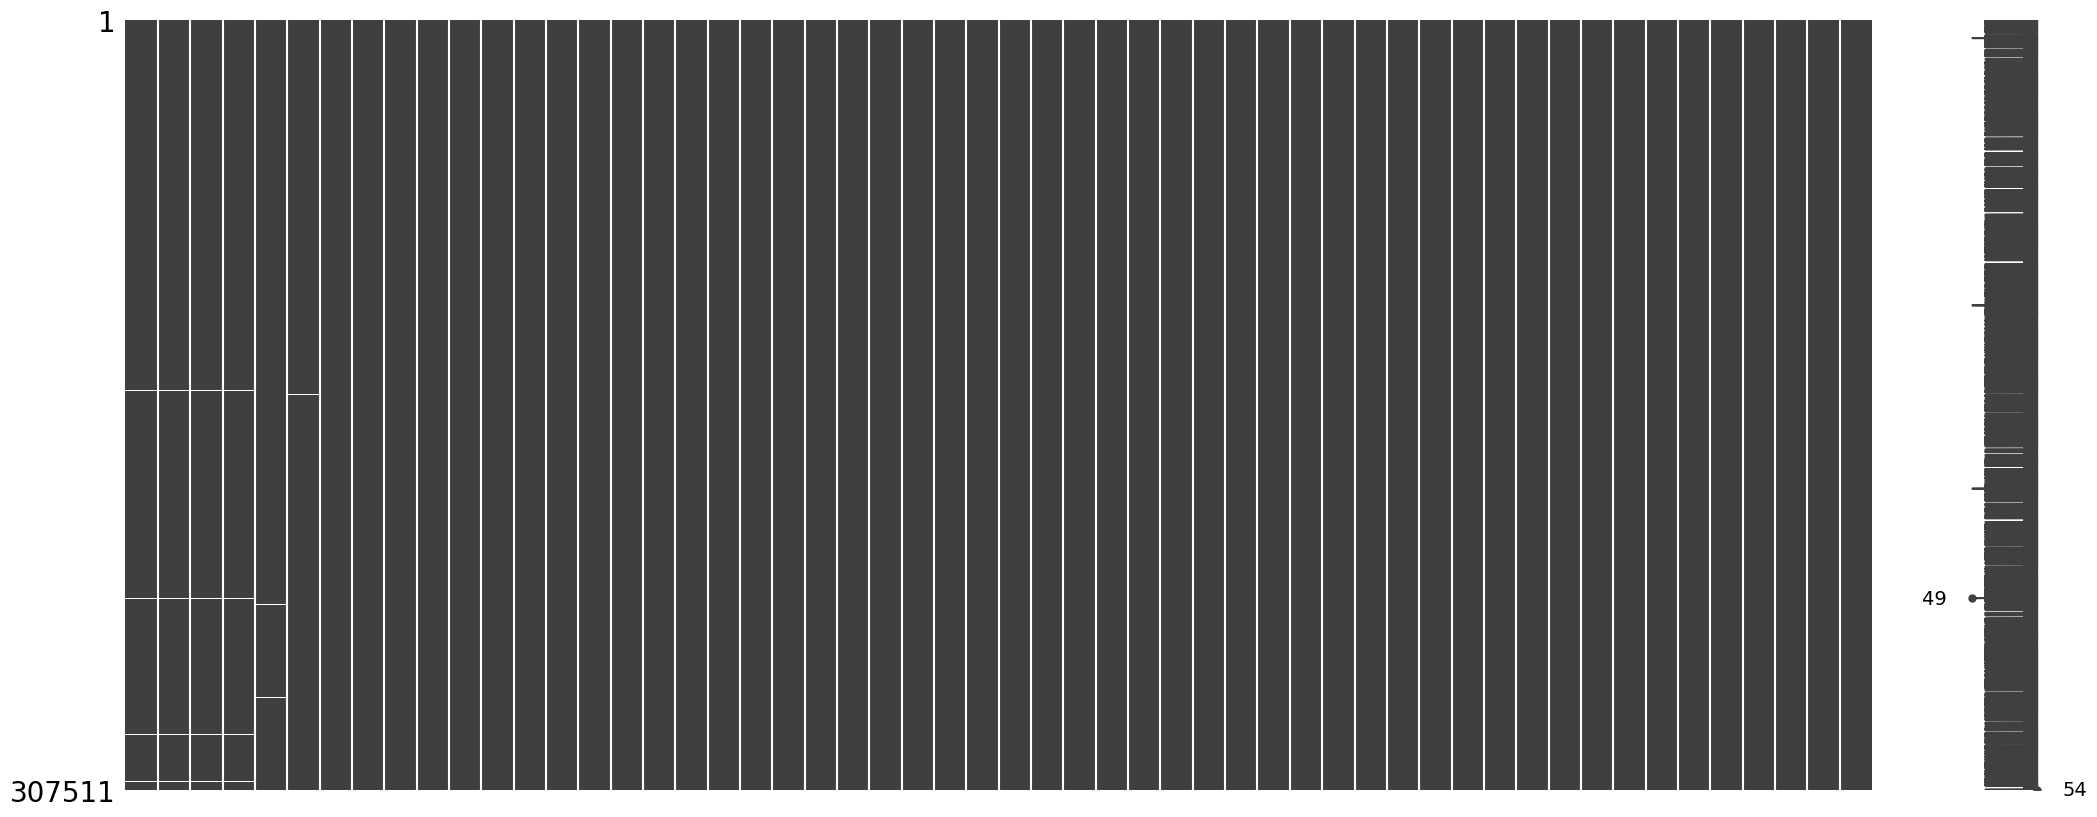

In [17]:
msno.matrix(numeric_data)
plt.show()

In [18]:
has_missing = numeric_data.isnull().any()
missing_data_columns = numeric_data.columns[has_missing]

In [19]:
missing_data_columns

Index(['DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [20]:
# Showing data with features that have missing values
numeric_data[missing_data_columns].head()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0


In [21]:
# Imputing the missing values with the mean of the data
mean_imputation(numeric_data[missing_data_columns])

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0
...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.0,0.0,0.681632,225000.0,27558.0,1.0,-273.0
307507,0.0,0.0,0.0,0.0,0.115992,225000.0,12001.5,1.0,0.0
307508,0.0,6.0,0.0,6.0,0.535722,585000.0,29979.0,1.0,-1909.0
307509,0.0,0.0,0.0,0.0,0.514163,319500.0,20205.0,2.0,-322.0


In [22]:
numeric_data.fillna(numeric_data.mean(), inplace = True)

In [23]:
has_missing = categorical_data.isnull().any()
missing_data_columns = categorical_data.columns[has_missing]

In [24]:
print("The shape of numeric data: {}".format(numeric_data.shape))
print("The shape of categorical data: {}".format(categorical_data.shape))

The shape of numeric data: (307511, 54)
The shape of categorical data: (307511, 11)


In [25]:
# concatenating the categorical and numerical column
df_final = pd.concat([numeric_data, categorical_data], axis = 1)

In [26]:
df_final.shape

(307511, 65)

In [27]:
df_final.head()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,...,NAME_HOUSING_TYPE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,House / apartment,Cash loans,Y,M,N,Business Entity Type 3,WEDNESDAY,Working,Unaccompanied,Secondary / secondary special
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,House / apartment,Cash loans,N,F,N,School,MONDAY,State servant,Family,Higher education
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,House / apartment,Revolving loans,Y,M,Y,Government,MONDAY,Working,Unaccompanied,Secondary / secondary special
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,House / apartment,Cash loans,Y,F,N,Business Entity Type 3,WEDNESDAY,Working,Unaccompanied,Secondary / secondary special
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,House / apartment,Cash loans,Y,M,N,Religion,THURSDAY,Working,Unaccompanied,Secondary / secondary special


In [28]:
df_final.head()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,...,NAME_HOUSING_TYPE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,House / apartment,Cash loans,Y,M,N,Business Entity Type 3,WEDNESDAY,Working,Unaccompanied,Secondary / secondary special
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,House / apartment,Cash loans,N,F,N,School,MONDAY,State servant,Family,Higher education
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,House / apartment,Revolving loans,Y,M,Y,Government,MONDAY,Working,Unaccompanied,Secondary / secondary special
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,House / apartment,Cash loans,Y,F,N,Business Entity Type 3,WEDNESDAY,Working,Unaccompanied,Secondary / secondary special
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,House / apartment,Cash loans,Y,M,N,Religion,THURSDAY,Working,Unaccompanied,Secondary / secondary special


In [29]:
df_final['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

# Adding input and output to variables
X = df_final.drop(['TARGET'], axis = 1)
y = df_final['TARGET']

# Splitting data into training and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101,
                                                   test_size = 0.3)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
df_final.head()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,...,NAME_HOUSING_TYPE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,House / apartment,Cash loans,Y,M,N,Business Entity Type 3,WEDNESDAY,Working,Unaccompanied,Secondary / secondary special
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,House / apartment,Cash loans,N,F,N,School,MONDAY,State servant,Family,Higher education
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,House / apartment,Revolving loans,Y,M,Y,Government,MONDAY,Working,Unaccompanied,Secondary / secondary special
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,House / apartment,Cash loans,Y,F,N,Business Entity Type 3,WEDNESDAY,Working,Unaccompanied,Secondary / secondary special
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,House / apartment,Cash loans,Y,M,N,Religion,THURSDAY,Working,Unaccompanied,Secondary / secondary special


In [33]:
categorical_data = df_final.select_dtypes(include = ['object', 'category'])
categorical_data.columns

Index(['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_CONTRACT_TYPE',
       'FLAG_OWN_REALTY', 'CODE_GENDER', 'FLAG_OWN_CAR', 'ORGANIZATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE',
       'NAME_EDUCATION_TYPE'],
      dtype='object')

In [34]:
from sklearn.preprocessing import OneHotEncoder

# Performing one hot encoding operation
encoder = OneHotEncoder()
X_train_ohe = encoder.fit_transform(X_train.select_dtypes(include = ['object', 'category']))
X_test_ohe = encoder.transform(X_test.select_dtypes(include = ['object', 'category']))

In [35]:
X_train_ohe

<215257x106 sparse matrix of type '<class 'numpy.float64'>'
	with 2367827 stored elements in Compressed Sparse Row format>

In [36]:
from scipy.sparse import hstack

In [37]:
# Concatenating categorical and numerical features with hstach
X_train_ohe = hstack([X_train.select_dtypes(exclude = ['object', 'category']), X_train_ohe])
X_test_ohe = hstack([X_test.select_dtypes(exclude = ['object', 'category']), X_test_ohe])

In [38]:
X_train_ohe

<215257x159 sparse matrix of type '<class 'numpy.float64'>'
	with 7144967 stored elements in COOrdinate format>

In [39]:
X_test_ohe

<92254x159 sparse matrix of type '<class 'numpy.float64'>'
	with 3062262 stored elements in COOrdinate format>

In [49]:
# Reseting index to reduce ambiguity
y_train_reset = y_train.reset_index(drop = True)
y_test_reset = y_test.reset_index(drop = True)